In [11]:
file_path = "classification_accuracy_ds_with_intent.jsonl"

In [12]:
import json
import re

def format_line(line:str):
    pattern = (
        r'"scores": \[\{"name": "classification_accuracy_score", "value": (\d+)\}\]'
        )
    replacement = r'"scores": \1'
    return re.sub(pattern, replacement, line)

def get_wrong_lines_from_jsonl(file):
    with open(file, "r", encoding="utf8") as f:
        lines = f.readlines()
        lines = [json.loads(format_line(line)) for line in lines if line]
        wrong_lines = [line for line in lines if line["scores"]==0]
    return wrong_lines

def extract_intent_tuples(line: dict):
    def fetch_word_between_hashes(string):
        pattern = r"<intention>(.*?)</intention>"
        matches = re.findall(pattern, string)[-1]
        return matches
    return f"label : {line['target_output']} - infered : {fetch_word_between_hashes(line['model_output'])}"
    # Example usage

In [13]:
#parse the json and create a hasmap with count of wrong predictions
wrong_lines = get_wrong_lines_from_jsonl(file_path)
with open("wrong_classifcations.jsonl", "w", encoding="utf8") as f:
    f.write(json.dumps(wrong_lines, indent=4))

tuples = [extract_intent_tuples(line) for line in wrong_lines]

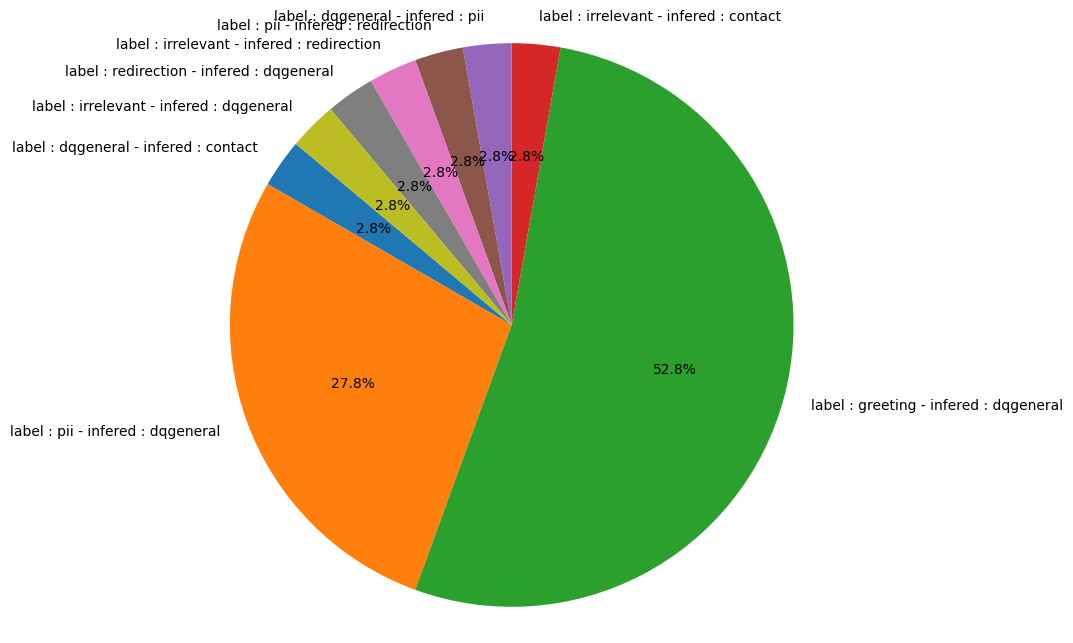

In [14]:
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

counter = Counter(tuples)
labels, values = zip(*counter.items())

indexes = np.arange(len(labels))
width = 1

# Create a pie chart
plt.figure(figsize=(8, 8))  # Optional: Adjust the figure size
plt.pie(values, labels=labels, autopct="%1.1f%%", startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis("equal")

# Display the pie chart
plt.show()

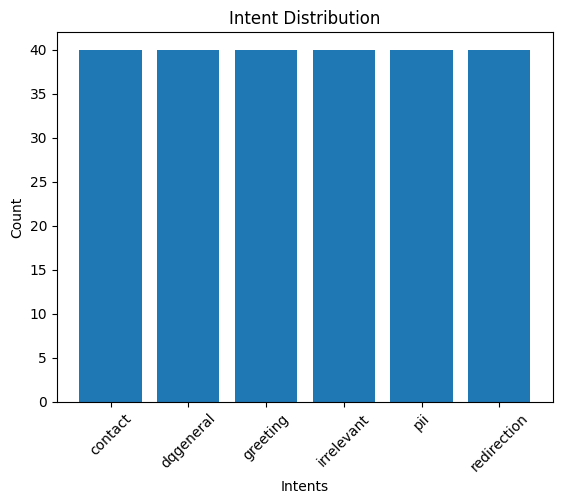

In [15]:
import matplotlib.pyplot as plt

dataset_path = "../data/working_dataset_with_intent.jsonl"

with open(dataset_path, "r", encoding="utf8") as f:
    lines = f.readlines()
    intents_distribution = [json.loads(line)["Intent"] for line in lines if line]

# Count the occurrences of each intent
intent_counts = {}
for intent in intents_distribution:
    if intent in intent_counts:
        intent_counts[intent] += 1
    else:
        intent_counts[intent] = 1

# Extract the intents and their corresponding counts
intents = list(intent_counts.keys())
counts = list(intent_counts.values())

# Plot the intent distribution
plt.bar(intents, counts)
plt.xlabel('Intents')
plt.ylabel('Count')
plt.title('Intent Distribution')
plt.xticks(rotation=45)
plt.show()




